In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#markdown
* hmm.. the paper says 570 observations, but we only have 569.
* Also, it is clear that the authors included the training data in their confusion matrix
*
* original paper: https://philarchive.org/archive/ABUPMO
* Other paper(better, same data: https://iopscience.iop.org/article/10.1088/1742-6596/2319/1/012025/pdf

# markdwon
* paper 2 used MATLAB and said this
    * data cleaning: In addition, the Perceptron algorithm is also
performed in this study. [14] define perceptron algorithm is one type of neural network to classify or
distinct patterns linearly. Perceptron is a supervised learning algorithm on a binary classification to
decide whether an input will be described or partitioned into a specific class; in this study, they were
divided into grades 0 and 1
*
* *
    * The parameters in this study employed the back propagation ANN algorithm: epochs, learning rates,
goals, and hidden layers.
    * The data is divided into 60% training data and 40% test data.
* Based on the tests,
    * the best parameter configuration is attained with epoch 1000, learning rate 0.01, goal
0.001, and hidden layer 5
    * with an accuracy of 96.93% and an error of 3.07%.

# markdown
* based on MS copilot (AI tool), this is what their parameters mean:
* It seems like you're describing parameters for training a machine learning model—possibly for something like a neural network. Here's a breakdown of what your configuration suggests:

    * Epochs (1000): You plan to train the model for 1000 iterations. Each epoch represents one full pass through the training dataset. This indicates you're aiming for thorough training.

    * Learning Rate (0.01): This controls the step size in the optimization process. A value of 0.01 is fairly moderate, suggesting you want steady progress without overshooting the optimal solution.

    * Goal (0.001): This might represent your desired error threshold or loss value. You're aiming for high precision with this low goal.

    * Hidden Layers (5): A network with 5 hidden layers implies you're building a deeper architecture. This could be ideal for solving complex problems, but it might also require careful tuning to avoid overfitting.

In [ ]:
df = pd.read_csv('/content/mod5_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# drop unneeded variables
df = df.drop(['id', 'Unnamed: 32'], axis = 1)
# custom mapping, made with help from AI
mapping = {'M': 1, 'B':0}   # M is malignant, B is benign
df['diagnosis'] = df['diagnosis'].replace(mapping)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<ipython-input-6-0f95411b7da0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace(mapping)


In [ ]:
# Sample DataFrame


# Create a new DataFrame with columns by their index positions
df_a = df.iloc[:, 1:]  # Select all rows and all columns except the first column (column 0)

# Create a new DataFrame without the first column
df_b = df.iloc[:, :1]  # Select all rows and only the first column (before position 1, which is the 2nd column)

data = pd.concat([df_a, df_b], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(5):  # Adding 5 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8948 - loss: 0.4164
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9846 - loss: 0.0703 
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9865 - loss: 0.0434 
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9985 - loss: 0.0175 
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9966 - loss: 0.0104     
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9944 - loss: 0.0209 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9876 - loss: 0.0418 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9896 - loss: 0.0378 
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 0.0593 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9905 - loss: 0.0219 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0040 
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


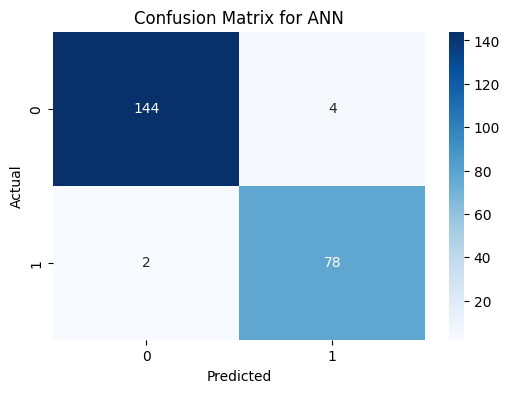

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion matrix for ann

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get class labels from probabilities

# Convert the one-hot encoded y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(y_test_labels, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.95      0.97      0.96        80

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test_labels, y_pred)
recall = recall_score(y_test_labels, y_pred)
f1 = f1_score(y_test_labels, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.9512195121951219
Recall: 0.975
F1-Score: 0.9629629629629629


In [ ]:
# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 2.0696e-10 - val_accuracy: 0.9737 - val_loss: 1.3688
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 6.5710e-10 - val_accuracy: 0.9737 - val_loss: 1.3688
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 8.9309e-11 - val_accuracy: 0.9737 - val_loss: 1.3690
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 3.9839e-10 - val_accuracy: 0.9737 - val_loss: 1.3691
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 3.9839e-10 - val_accuracy: 0.9737 - val_loss: 1.3691
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 9.6754e-10 - val_accuracy: 0.9737 - val_loss: 1.3692
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 5.8265e-11 - val_accuracy: 0.9737 - val_loss: 1.3693
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.00

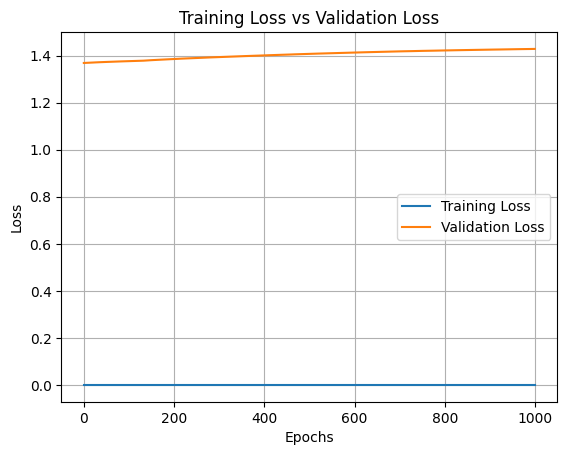

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# New Section

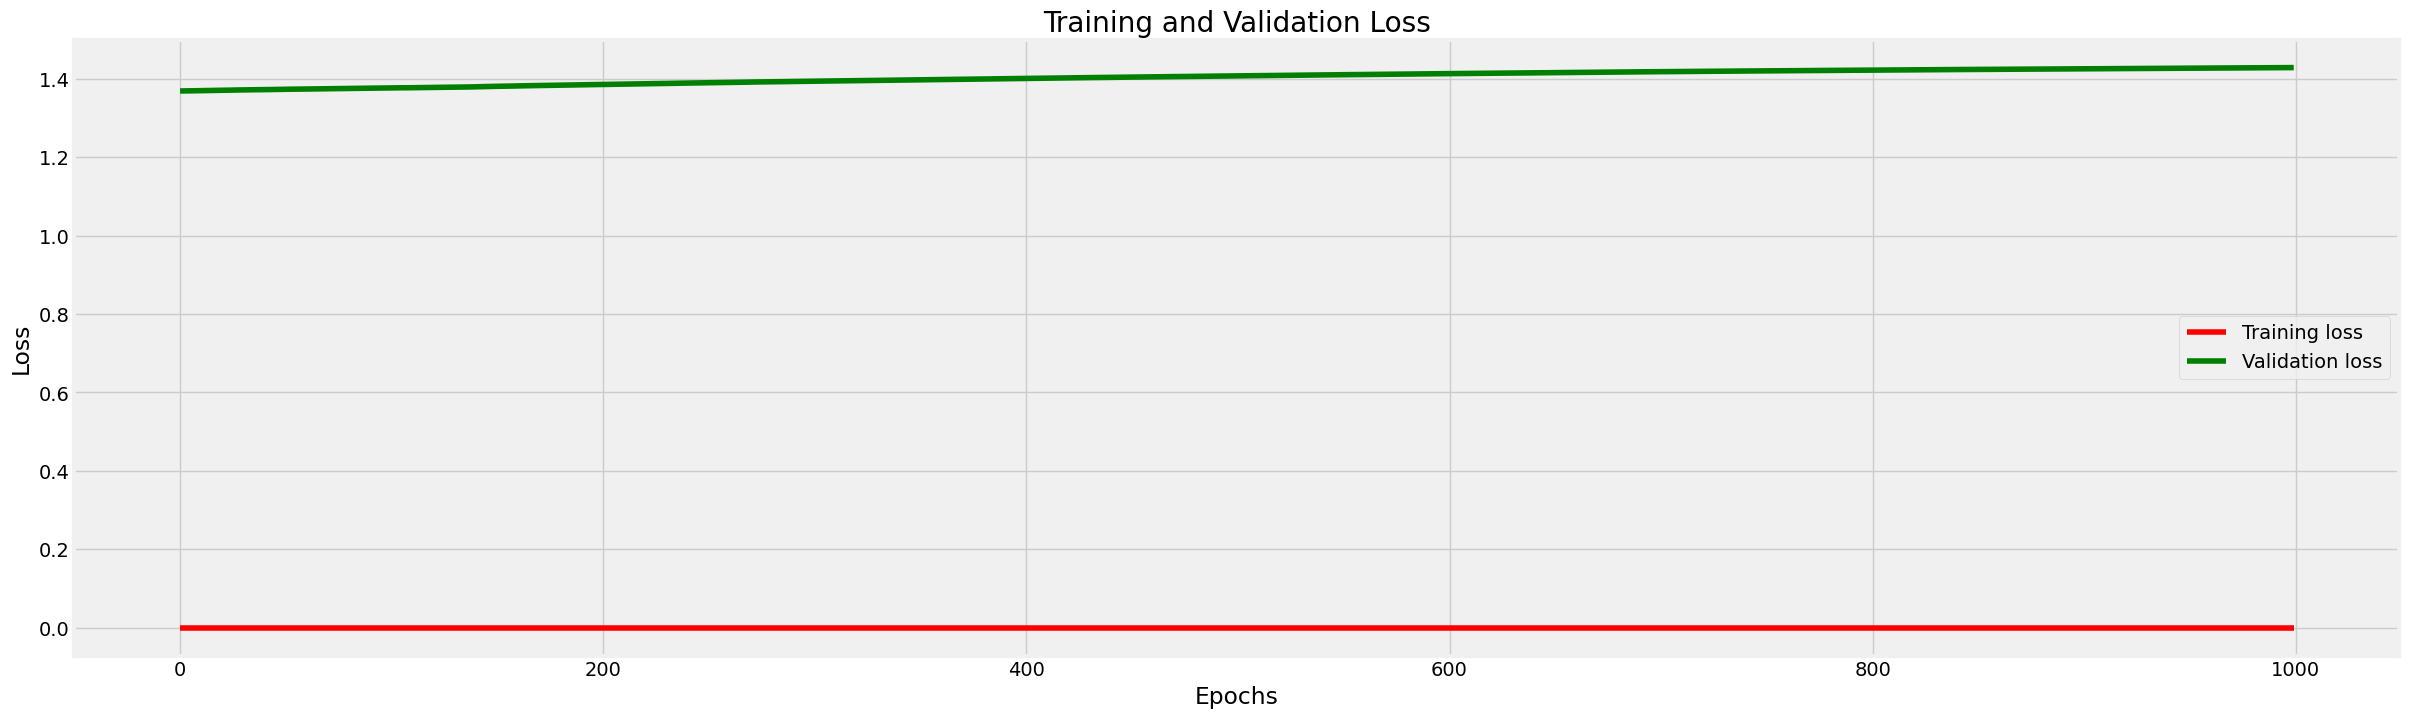

In [ ]:
plt.figure(figsize= (30, 8))
plt.style.use('fivethirtyeight')

plt.plot(history.history['loss'], 'r', label= 'Training loss')
plt.plot(history.history['val_loss'], 'g', label= 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

# code from https://www.kaggle.com/code/maryemmahmoud/breast-cancer-wisconsin-diagnostic-using-ann

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(5):  # Adding 5 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5176 - loss: 19.1306
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7420 - loss: 39.2546
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 18.5816
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9309 - loss: 0.2002
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9426 - loss: 0.1757
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9687 - loss: 0.1245
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9622 - loss: 0.1299 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9750 - loss: 0.0997 
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9596 - loss: 0.1341 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9563 - loss: 0.1610 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9530 - loss: 0.1376 
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(5):  # Adding 5 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6005 - loss: 1524759.0000
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4611 - loss: 5651.8965
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5399 - loss: 282.4655 
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5246 - loss: 47.2488
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5836 - loss: 17.7656
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5557 - loss: 12.0522
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5298 - loss: 44.5886 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5756 - loss: 29.3806
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4767 - loss: 8.3589   
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5577 - loss: 9.9888 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5177 - loss: 7.6305 
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(10):  # Adding 10 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4982 - loss: 970.8668
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5861 - loss: 81.1364
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4596 - loss: 1.6006 
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5519 - loss: 3.4051 
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5201 - loss: 0.7186 
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5823 - loss: 0.7101 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5194 - loss: 0.8207 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5036 - loss: 0.7874 
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6207 - loss: 0.7087 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6156 - loss: 0.6704 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6351 - loss: 0.6581 
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(10):  # Adding 510 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4780 - loss: 554504000.0000
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3305 - loss: 5941401.0000 
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5530 - loss: 1230.4099 
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5617 - loss: 71.4532 
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 157.5003
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7347 - loss: 43.6253 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7928 - loss: 59.3471 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 27.0461 
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7510 - loss: 22.3811 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8054 - loss: 48.8740 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7418 - loss: 36.4384 
Epoch 12/1000
11/

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(10):  # Adding 10 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6109 - loss: 0.5908
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9728 - loss: 0.1268 
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9905 - loss: 0.0761 
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9817 - loss: 0.0633 
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9868 - loss: 0.0622 
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9845 - loss: 0.0400 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9840 - loss: 0.0372 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.0235 
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.3915     
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9795 - loss: 0.2168 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9799 - loss: 0.1489 
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(15):  # Adding 15 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5381 - loss: 1204.9355
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4850 - loss: 17.2110
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5199 - loss: 2.0786
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5898 - loss: 0.7318 
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5869 - loss: 0.7579 
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5434 - loss: 0.8206 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5883 - loss: 0.6870
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6174 - loss: 0.6795
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5978 - loss: 0.6762 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6319 - loss: 0.6608 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.6843
Epoch 12/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(15):  # Adding 15 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5301 - loss: 235552179748864.0000
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5240 - loss: 834170716160.0000 
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4571 - loss: 820905408.0000  
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5054 - loss: 3813.5334
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5138 - loss: 14082.3818
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5242 - loss: 4096778305536.0000
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4991 - loss: 0.8391 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5629 - loss: 0.8901
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5507 - loss: 1.0563 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5912 - loss: 0.7635
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5630 - loss: 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your DataFrame
data = data  # Replace 'data.csv' with your file
X = data.iloc[:, :-1].values  # Features (all columns except the last)
y = data.iloc[:, -1].values   # Target (last column)

# Split data into training (60%) and testing (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target into categorical (if needed)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()

# Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Input dimension
for _ in range(15):  # Adding 15 hidden layers
    model.add(Dense(units=64, activation='relu'))

# Output Layer
model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Adjust as per task

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6599 - loss: 0.5916
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9234 - loss: 0.2665
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9839 - loss: 0.1002
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9726 - loss: 0.1667  
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9840 - loss: 0.0845     
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9916 - loss: 0.0749 
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9831 - loss: 0.0527 
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.0529 
Epoch 9/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9921 - loss: 0.0170 
Epoch 10/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9958 - loss: 0.0155 
Epoch 11/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9713 - loss: 0.0773     
Epoch 12/1000
11/11 ━━━━━━━━━━━━